In [1]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GlobalMaxPooling1D, Reshape
from warnings import simplefilter,filterwarnings
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.io
import pickle
import glob
import sys
import gc
import os
import re
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# data_path = '/content/drive/My Drive/Colab Notebooks/Tasks/Disease prediction based on human activity recognition using smartphones/DataSet'
# code_path = '/content/drive/My Drive/Colab Notebooks/Tasks/Disease prediction based on human activity recognition using smartphones/Codes'
# results_path = '/content/drive/My Drive/Colab Notebooks/Tasks/Disease prediction based on human activity recognition using smartphones/Results'
# images_path = os.path.join(results_path, "images")

In [4]:
data_path = "C:\\Users\\user\\Python_Anaconda\\task\\06\\DataSet"
results_path = "C:\\Users\\user\\Python_Anaconda\\task\\06\\Results"
images_path = os.path.join(results_path, "images")

In [5]:
Activity_map = {
    'LAYING': 0,
    'SITTING': 1,
    'STANDING': 2,

    'WALKING': 3,
    'WALKING_DOWNSTAIRS': 4,
    'WALKING_UPSTAIRS': 5,
}

In [6]:
train = pd.read_csv(os.path.join(data_path,"train.csv"))
# train['Activity'] = train['Activity'].map(Activity_map)
print(train.shape)
train.head()

(7352, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
test = pd.read_csv(os.path.join(data_path,"test.csv"))
# test['Activity'] = test['Activity'].map(Activity_map)
print(test.shape)
test.head()

(2947, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


# Data Cleaning

## 1. Check for Duplicates

In [8]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [9]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

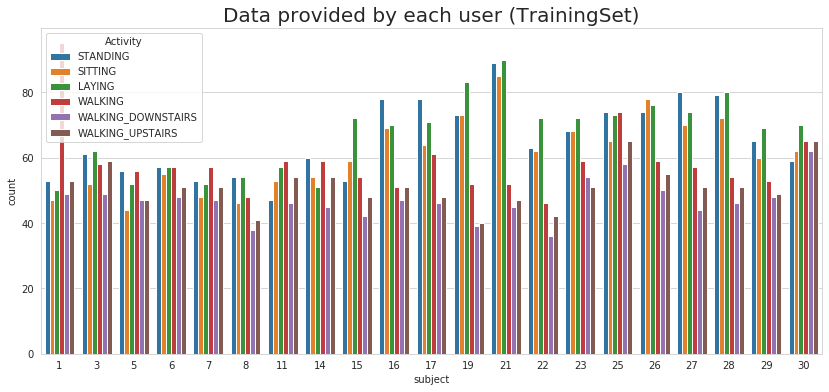

In [10]:
plt.figure(figsize=(14,6))
plt.title('Data provided by each user (TrainingSet)', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.savefig("{} .png".format(os.path.join(images_path , "Data provided by each user (TrainingSet)")))
plt.show()

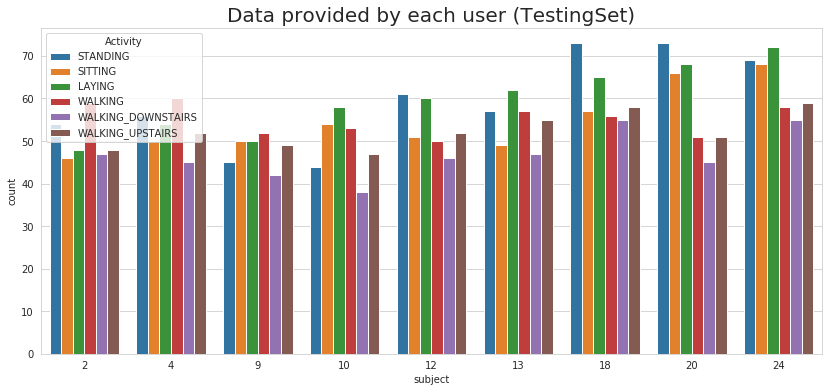

In [11]:
plt.figure(figsize=(14,6))
plt.title('Data provided by each user (TestingSet)', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = test)
plt.savefig("{} .png".format(os.path.join(images_path , "Data provided by each user (TestingSet)")))
plt.show()

In [12]:
for i in list(set(test['subject'].tolist())):
  print(50*"-")
  temp = test[test['subject']==i]
  n = len(temp['subject'].tolist())
  print(f"The Number of Samples for Subject number {i} : ", n, "Number Of Activetes per day : ", n//30)
  print(temp['Activity'].value_counts())

--------------------------------------------------
The Number of Samples for Subject number 2 :  302 Number Of Activetes per day :  10
WALKING               59
STANDING              54
WALKING_UPSTAIRS      48
LAYING                48
WALKING_DOWNSTAIRS    47
SITTING               46
Name: Activity, dtype: int64
--------------------------------------------------
The Number of Samples for Subject number 4 :  317 Number Of Activetes per day :  10
WALKING               60
STANDING              56
LAYING                54
WALKING_UPSTAIRS      52
SITTING               50
WALKING_DOWNSTAIRS    45
Name: Activity, dtype: int64
--------------------------------------------------
The Number of Samples for Subject number 9 :  288 Number Of Activetes per day :  9
WALKING               52
SITTING               50
LAYING                50
WALKING_UPSTAIRS      49
STANDING              45
WALKING_DOWNSTAIRS    42
Name: Activity, dtype: int64
--------------------------------------------------
The Numb

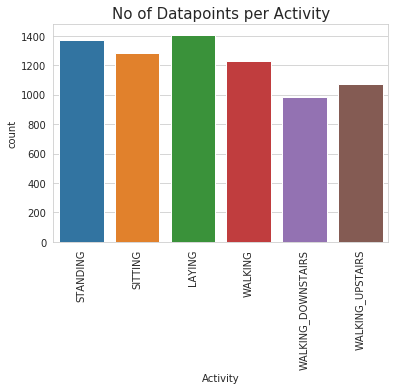

In [13]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(x='Activity',data = train)
plt.xticks(rotation=90)
plt.savefig("{} .png".format(os.path.join(images_path , "No of Datapoints per Activity")))
plt.show()

## 4. Changing feature names

In [14]:
columns = train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')
train.columns = columns
test.columns = columns

## 5. Save this dataframe in a csv files

save our data to csv file for future prediction ,we will use these files when we will do predictions in the next notebook

In [15]:
train.to_csv(os.path.join(data_path,'train.csv'), index=False)
test.to_csv(os.path.join(data_path,'test.csv'), index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

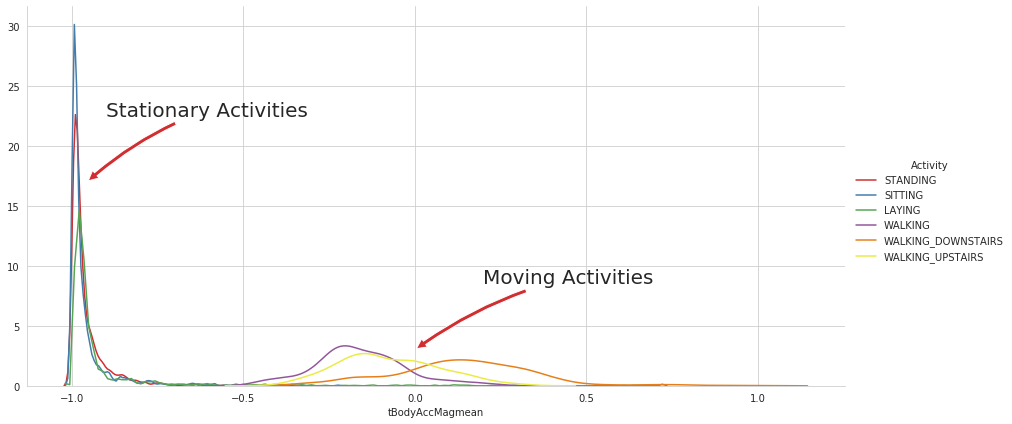

In [16]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', height=6, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.savefig("{} .png".format(os.path.join(images_path , "Moving Activities VS Stationary Activities")))
plt.show()

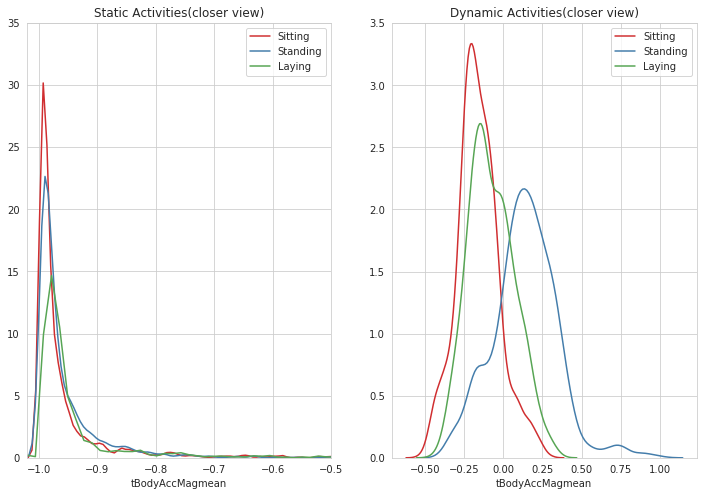

In [17]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]



plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMagmean'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist = False, label = 'Laying')

plt.savefig("{} .png".format(os.path.join(images_path , "Static Activities(closer view) && Dynamic Activities(closer view)")))


### 3. Magnitude of an acceleration can saperate it well

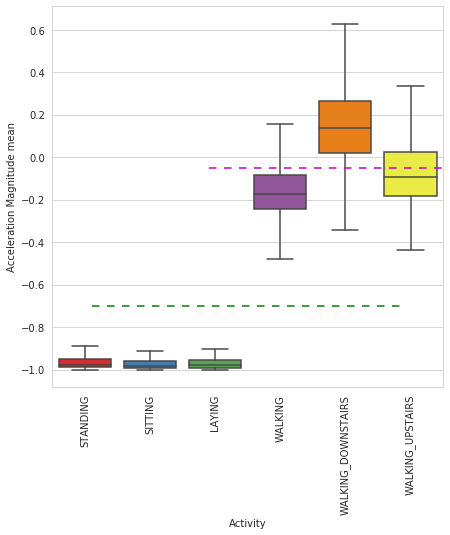

In [18]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.savefig("{} .png".format(os.path.join(images_path , "boxplot for Acceleration Magnitude mean")))
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters

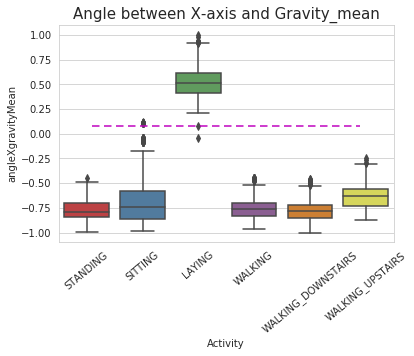

In [19]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.savefig("{} .png".format(os.path.join(images_path , "boxplot for Angle between X-axis and Gravity_mean")))

plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

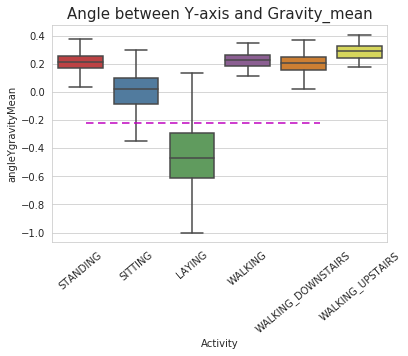

In [20]:
sns.boxplot(x='Activity', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.savefig("{} .png".format(os.path.join(images_path , "boxplot for Angle between Y-axis and Gravity_mean")))

plt.show()

# Apply t-sne on the data

Here we will see these datapoints in 2 dimensions and try to observe the behaviour of the datapoints

In [21]:
"""
The TSNE class in scikit-learn (sklearn) is used to perform t-Distributed Stochastic Neighbor Embedding (t-SNE),
a popular dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space,
typically 2D or 3D. t-SNE aims to preserve the local structure of the data by modeling the relationships between data points in the high-dimensional
space and representing these relationships in the lower-dimensional space.
"""

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):

    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')

        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})

        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig("{} .png".format(os.path.join(images_path , "t-sne_"+str(index))))
        plt.show()
        print('Done')



performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 2.475s...
[t-SNE] Computed neighbors for 7352 samples in 82.492s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.140s
[t-SNE] Iteration 50: error = 114.0125427, gradient norm = 0.0209223 (50 iterations in 8.929s)
[t-SNE] Iteration 100: error = 97.2802734, gradient norm = 0.0179265 (50 iterations in

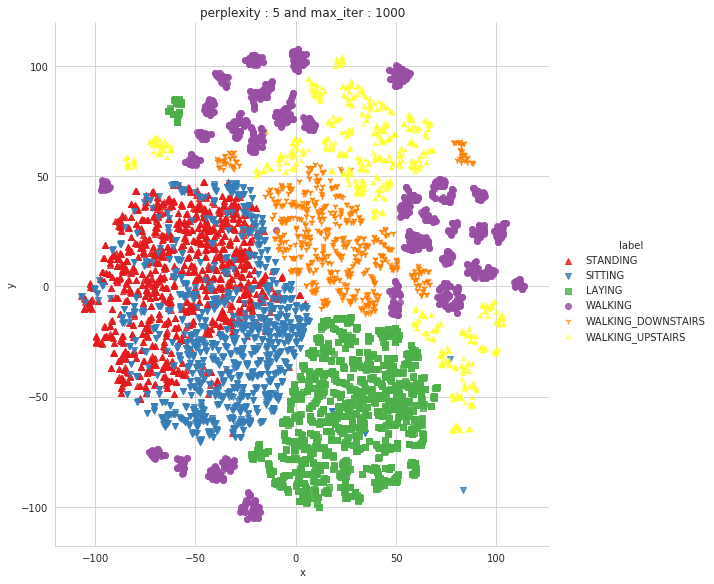

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 2.392s...
[t-SNE] Computed neighbors for 7352 samples in 87.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.244s
[t-SNE] Iteration 50: error = 105.6803284, gradient norm = 0.0189517 (50 iterations in 4.149s)
[t-SNE] Iteration 100: error = 90.5766754, gradient norm = 0.0099271 (50 iterati

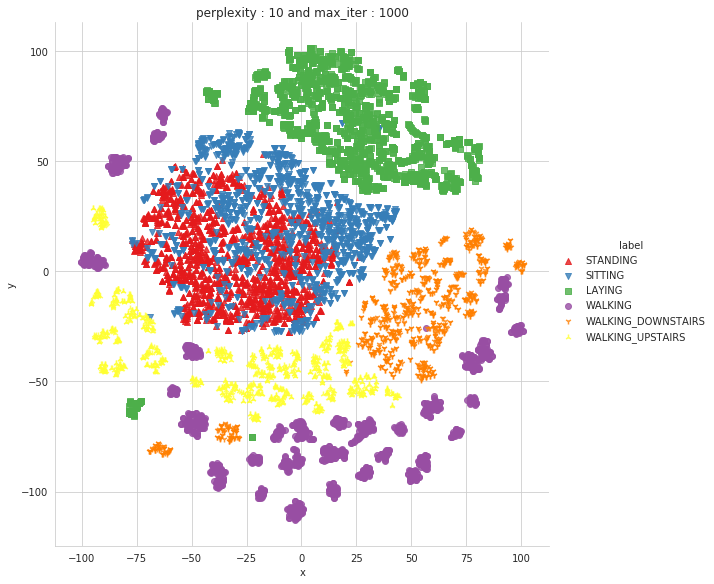

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 2.255s...
[t-SNE] Computed neighbors for 7352 samples in 87.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.481s
[t-SNE] Iteration 50: error = 97.5196838, gradient norm = 0.0187944 (50 iterations in 5.153s)
[t-SNE] Iteration 100: error = 83.9683456, gradient norm = 0.0064983 (50 iteratio

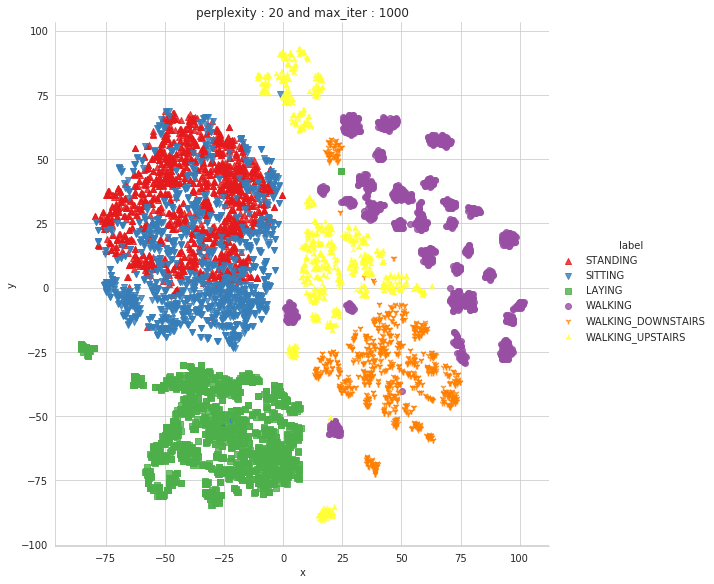

Done


'\n  perplexities :\n  It roughly interprets the number of neighbors considered for each\n  point during optimization. Higher perplexity values consider more neighbors.\n'

In [22]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])
"""
  perplexities :
  It roughly interprets the number of neighbors considered for each
  point during optimization. Higher perplexity values consider more neighbors.
"""


-->As we can see all the features except standing and sitting can be seperated very easily